In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = "svg"


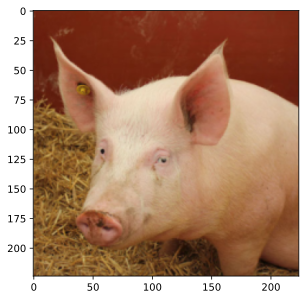

In [3]:
from PIL import Image
from torchvision import transforms

pig_img=Image.open("pig.jpg")

preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

pig_tensor = preprocess(pig_img)[None,:,:,:]

plt.imshow(pig_tensor[0].numpy().transpose(1, 2, 0))
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torchvision.models import resnet50


class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.mean = torch.Tensor(mean)
        self.std = torch.Tensor(std)
    def forward(self, x):
        return (x - self.mean[None,:,None,None])/self.std.type_as(x)[None,:,None,None]


norm = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

model = resnet50(pretrained=True)
model.eval()
